# Import packages

In [1]:
import numpy as np
import pandas as pd

from analysis.src.missing_value_analysis import SimpleMissingValueAnalysis
from analysis.src.basic_data_inspection import DataInspector, DataTypeInspectionStrategy, SummaryStatisticsInspectionStrategy

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load data

In [2]:
df = pd.read_csv('../datasets/train.csv')

# Basic Data Inspection
## Data Types and Non-null counts

In [3]:
data_inspector = DataInspector(DataTypeInspectionStrategy())
data_inspector.execute_inspection(df)


Data types and Non-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

## Insights
- The dataset contains **1460 entries** and **81 columns**
- **Data types:** There are 34 columns with `int64` data type, 3 columns with `float64` data type and 43 columns with `object` data type.
    - **Numerical Features:** These include features like `LotFrontage`, `LotArea`, `OverallQual`, `YearBuilt`, etc.
    - **Categorical Features:** Features like `MSZoning`, `Street`, `Alley`, `LotShape`, etc., are categorical
## Summary Statistics

In [4]:
data_inspector = data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary statistics (Numerical Features)
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   1

## Insights:
### Numerical Features
- `MSSubClass` (Type of dwelling involved in the sale): Numerical encoding of building types, ranging from 20 to 190, with a mean of **56.90** and a standard deviation of **42.30**
- `LotFrontage` (Linear feet of street connected to the property): Ranges from **21 to 313 feet**, with a mean of **70.05 feet**.
- `LotArea` (Lot size in square feet): Ranges from **1,300 to 215,245 sq ft**, with a mean of **10,516 sq ft** with a large maximum value indicating potential outliers.
- `OverallQual` (Overall material and finish quality): Ranges from **1 (very poor) to 10 (very excellent)**, with a mean of **6.10**, indicates most properties have above-average construction quality.
- `OverallCond` (Overall condition rating): Ranges from **1 to 9**, with a mean of **5.57** with most properties in average condition and limited variability
- `YearBuilt` (Year the house was built): Ranges from **1872 to 2010**, with a mean of **1971**, indicating a mix of older and more modern properties.
- `YearRemodAdd` (Year the house was remodeled): Ranges from **1950 to 2010**, with a mean of **1984** which shows many houses have undergone remodeling.
- `MasVnrArea` (Masonry veneer area in square feet): Ranges from **0 to 1,600 sq ft**, with a mean of **103.85 sq ft** and a median of **0** indicating that many homes lack masonry veneer
- `BsmtFinSF1` (Finished basement area type 1 in square feet): Ranges from **0 to 5,644 sq ft**, with a mean of **443.64 sq ft**, showing significant variation in basement finishes.
- `BsmtFinSF2` (Finished basement area type 2 in square feet): Ranges from **0 to 1,474 sq ft**, with a mean of **46.54 sq ft** and a median of **0**, indicating that most homes lack a second type of finished basement
- `BsmtUnfSF` (Unfinished basement area in square feet): Ranges from **0 to 2,336 sq ft**, with a mean of **567.24 sq ft**, indicating many homes have unfinished basement spaces
- `TotalBsmtSF` (Total basement area in square feet): Ranges from **0 to 6,110 sq ft**, with a mean of **1,057.42 sq ft** and some potential outliers with very large basement areas
- `1stFlrSF` (First-floor area in square feet): Ranges from **334 to 4,692 sq ft**, with a mean of **1,162.63 sq ft** indicating moderate first-floor sizes.
- `2ndFlrSF` (Second-floor area in square feet): Ranges from **0 to 2,065 sq ft**, with a mean of **346.92 sq ft** and a median of **0** showing that many homes lack a second floor
- `LowQualFinSF` (Low-quality finished area in square feet): Ranges from **0 to 572 sq ft**, with a mean of **5.84 sq ft** and a median of **0** indicating that most homes do not have low-quality finished spaces 
- `GrLivArea` (Above ground living area in square feet): Ranges from **334 to 5,642 sq ft**, with a mean of **1,515.46 sq ft**, indicating a variety of home sizes.
- `BsmtFullBath` (Number of full bathrooms in the basement): Ranges from **0 to 3**, with a mean of **0.42** and a median of **0**, showing that most homes do not have a full bathroom in the basement
- `BsmtHalfBath` (Number of half bathrooms in the basement): Ranges from **0 to 2**, with a mean of **0.06**, indicating that few homes have basement half bathrooms.
- `FullBath` (Number of full bathrooms above grade): Ranges from **0 to 3**, with a mean of **1.57**, meaning most homes have at least one full bathroom
- `HalfBath` (Number of half bathrooms above grade): Ranges from **0 to 2**, with a mean of **0.38**, indicating that most homes do not have half bathroom or they just have one half bathroom.
- `BedroomAbvGr` (Number of bedrooms above grade): Ranges from **0 to 8**, with a mean of **2.87**, showing that most homes have 2 or 3 bedrooms.
- `KitchenAbvGr` (Number of kitchens above grade): Ranges from **0 to 3**, with a mean of **1.04**, indicating that nearly all homes have one kitchen.
- `TotRmsAbvGrd` (Total rooms above grade): Ranges from **2 to 14**, with a mean of **6.52**, showing that most homes have a moderate number of rooms.
- `Fireplaces` (Number of fireplaces): Ranges from **0 to 3**, with a mean of **0.61**, indicating that  many homes lack fireplaces.
- `GarageYrBlt` (Year the garage was built): Ranges from **1900 to 2010**, with a mean of **1978**, reflecting the timeline of garage construction.
- `GarageCars` (Garage size in car capacity): Ranges from **0 to 4**, with a mean of **1.77** indicating that most homes have garages accommodating **1 to 2 cars**.
- `GarageArea` (Garage area in square feet): Ranges from **0 to 1,418 sq ft**, with a mean of **472.98 sq ft** and a standard deviation of **213.80 sq ft**, showing significant variation in garage sizes.
- `WoodDeckSF` (Wooden deck area in square feet): Ranges from **0 to 857 sq ft**, with a mean of **94.24 sq ft** and a median of **0 sq ft**, indicating that many homes lack wooden decks.
- `OpenPorchSF` (Open porch area in square feet): Ranges from **0 to 547 sq ft**, with a mean of **46.66 sq ft**, meaning many homes lack open porches.
- `EnclosedPorch` (Enclosed porch area in square feet): Ranges from **0 to 552 sq ft**, with a mean of **21.95 sq ft** and a median of **0 sq ft**, indicating that most homes do not have an enclosed porch.
- `3SsnPorch` (Three-season porch area in square feet): Ranges from **0 to 508 sq ft**, with a mean of **3.49 sq ft** and a median of **0 sq ft**, showing that very few homes have this feature.
- `ScreenPorch` (Screened porch area in square feet): Ranges from **0 to 480 sq ft**, with a mean of **15.06 sq ft** and a median of **0 sq ft**, indicating that most homes lack this feature.
- `PoolArea` (Pool area in square feet): Ranges from **0 to 738 sq ft**, with a mean of **2.76 sq ft** and median of **0 sq ft**, showing that pools are uncommon in this dataset.
- `MiscVal` (Value of miscellaneous features in dollars): Ranges from **\$0 to \$15,500**, with a mean of **\$43.49** and a median of **$0**, indicating that most homes do not have significant miscellaneous values.
- `MoSold` (Month of sale): Ranges from **1 to 12**, with a mean of **6.32**, indicating that sales are evenly distributed across months.
- `YrSold` (Year of sale): Ranges from **2006 to 2010**, with a mean of **2007.82**, showing that sales are balanced across the years.
- `SalePrice` (Target variable): Ranges from **\$34,900 to \$755,000**, with a mean of **\$180,921.20** and a standard deviation of **\$79,442.50** suggests significant price variability.

### Categorical Features
- `MSZoning` (Zoning classification): Contains **5 unique** categories, with **RL (Residential Low Density)** being the most common, suggesting that a majority of homes are in low-density residential areas.
- `Street` (Type of road access): Has **2 unique values**; **Pave (paved)** and **Grvl (gravel)** with pave dominating the dataset with 1454 occurrences, indicating most properties have paved road access.
- `Alley` (Type of alley access): Contains **2 unique** categories, **Grvl (gravel)** and **Pave (paved)**, but has a high number of missing values (91 non-missing entries), suggesting alley access is not common in this dataset.
- `LotShape` (General shape of property): Has **4 unique** categories, with **Reg (regular)** being the most common
- `LandContour` (Flatness of the property): Contains **4 unique** categories, with **Lvl (near flat/level)** being the most frequent
- `Utilities` (Type of utilities available): Contains **2 unique** values, with **AllPub (all public utilities)** dominating, suggesting that utilities are widely available for nearly all properties.
- `LotConfig` (Lot configuration): Contains **5 unique** categories, with **Inside (inside lot)** being the most common, showing that most properties are inside lots rather than corner or cul-de-sac lots.
- `LandSlope` (Slope of the property): Contains **3 unique** values, with **Gtl (gentle slope)** being the most frequent.
- `Neighborhood`: Contains **25 unique** categories, with `NAmes` being the most common neighborhood, suggesting that some neighborhoods dominate the dataset, which might influence property prices.
- `Condition1` (Proximity to various conditions): Contains **9 unique** categories, with **Norm (normal condition)** being the most frequent, indicating most properties are not affected by proximity to major roads or railroads.
- `Condition2` (Secondary proximity to various conditions): Contains **8 unique** values, with **Norm** being the most frequent, reinforcing that most properties are unaffected by secondary road/railroad proximity.
- `BldgType` (Type of building): Contains **5 unique** categories, with **1Fam (single-family detached)** being the most common, which highlights the dominance of single-family homes in this dataset.
- `HouseStyle` (Style of dwelling): Contains **8 unique** categories, with **1Story (one-story homes)** being the most frequent, indicating a significant preference for single-story homes.
- `RoofStyle`: Contains **6 unique** styles, with **Gable** being the most frequent, suggesting that **gable** roofs are the most common in the dataset.
- `RoofMatl` (Roof material): Contains **8 unique** materials, with **CompShg (composite shingles)** being the most common, indicating composite shingles are the standard roofing material.
- `Exterior1st` (Primary exterior material): Contains **15 unique** materials, with **VinylSd (vinyl siding)** being the most frequent, suggesting **vinyl siding** is a popular exterior finish.
- `Exterior2nd` (Secondary exterior material): Contains **16 unique** materials, with **VinylSd** being the most frequent, similar to `Exterior1st`, **vinyl siding** dominates.
- `MasVnrType` (Masonry veneer type): Contains **3 unique** categories, with **BrkFace (brick face)** being the most frequent
- `ExterQual` (Exterior quality): Contains **4 unique** categories, with **TA (Typical/Average)** being the most frequent, indicating that most homes have standard exterior quality.
- `ExterCond` (Exterior condition): Contains **5 unique** categories, with **TA** being the most frequent, most properties have an average exterior condition.
- `Foundation`: Contains **6 unique** types, with **PConc (poured concrete)** being the most frequent, indicating that **poured concrete** is the most common foundation type.
- `BsmtQual` (Basement height): Contains **4 unique** categories, with **TA** being the most frequent, suggesting that most basements are of typical quality.
- `BsmtCond` (Basement condition): Contains **4 unique** categories, with **TA** being the most frequent, meaning most basements are in average condition.
- `BsmtExposure` (Walkout basement exposure): Contains **4 unique** categories, with **No (no exposure)** being the most frequent, indicating that most homes lack basement exposure.
- `BsmtFinType1` (Basement finished area type 1): Contains **6 unique** categories, with **Unf (unfinished)** being the most frequent, showing that many basements remain unfinished.
- `Heating`: Contains **6 unique** categories, with **GasA (gas forced air)** being the most frequent
- `HeatingQC` (Heating quality and condition): Contains **5 unique** categories, with **Ex (excellent)** being the most frequent, indicating that most heating systems are of excellent quality.
- `CentralAir` (Central air conditioning): Contains **2 unique** values (**Y for Yes, N for No**), with Y being the most frequent, suggesting that most homes have central air conditioning.
- `Electrical`: Contains **5 unique** categories, with **SBrkr (standard circuit breaker and romex)** being the most frequent
- `KitchenQual` (Kitchen quality): Contains **4 unique** categories, with **TA** being the most frequent indicating that most kitchens are of average quality.
- `Functional` (Home functionality rating): Contains **7 unique** categories, with **Typ (typical)** being the most frequent, suggesting that most homes have typical functionality.
- `FireplaceQu` (Fireplace quality): Contains **5 unique** categories, with **Gd (good)** being the most frequent, indicating that many homes lack fireplaces (missing values exist).
- `GarageType`: Contains **6 unique** categories, with **Attchd (attached garage)** being the most frequent, suggesting that most homes have attached garages.
- `GarageFinish` (Garage interior finish): Contains **3 unique** categories, with **Unf (unfinished)** being the most frequent, suggesting that most garages are unfinished.
- `GarageQual` (Garage quality): Contains **3 unique** categories, with **TA** being the most frequent, indicating that most garages are of average quality.
- `GarageCond` (Garage condition): Contains **5 unique** categories, with **TA** being the most frequent, suggesting that most garages are in average condition.
- `PavedDrive` (Paved driveway): Contains **3 unique** categories, with **Y (paved)** being the most frequent, indicating that most homes have paved driveways.
- `PoolQC` (Pool quality): Contains **3 unique** categories, with **Gd (good)** being the most frequent.
- `Fence`: Contains **4 unique** categories, with **MnPrv (minimum privacy)** being the most frequent
- `MiscFeature` (Miscellaneous feature): Contains **4 unique** categories, with **Shed** being the most frequent
- `SaleType`: Contains **9 unique** categories, with **WD (warranty deed)** being the most frequent, indicating that most sales involve a warranty deed.
- `SaleCondition`: Contains **6 unique** categories, with **Normal** being the most frequent, suggesting that most sales occur under normal conditions.


# Missing Value Analysis


Missing values Count by Column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


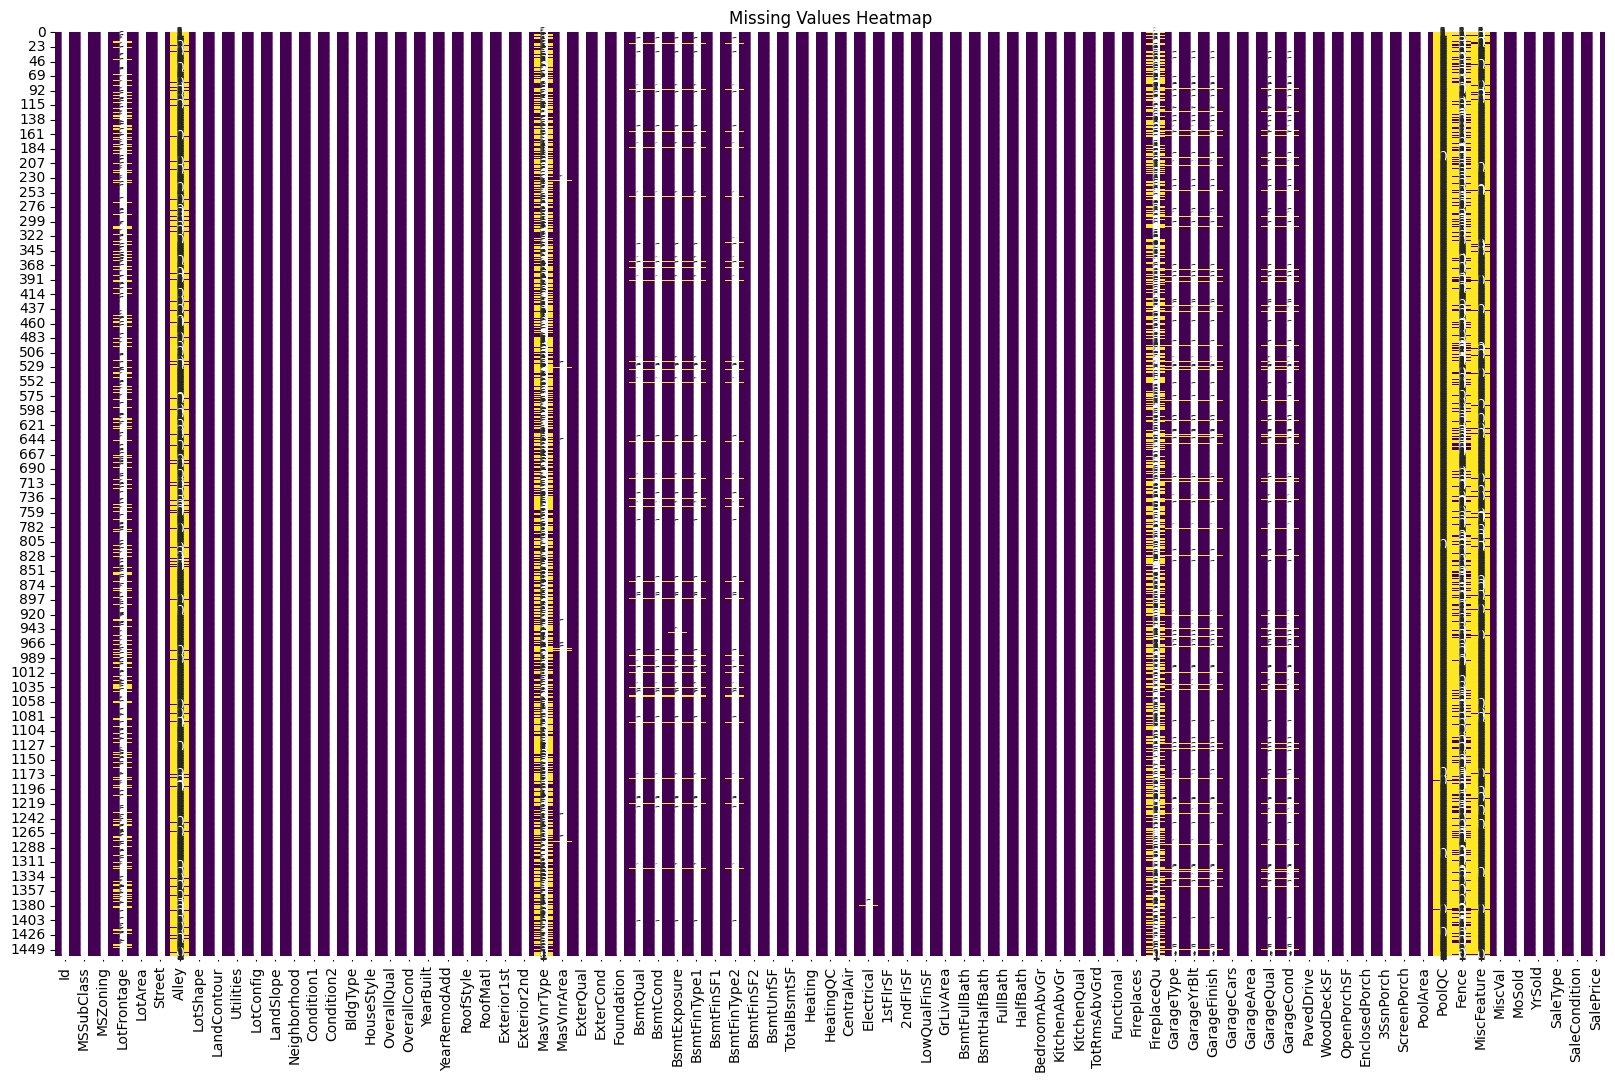

In [5]:
missing_value_analyzer = SimpleMissingValueAnalysis()
missing_value_analyzer.analyze(df)

## Insights:
- 